# Setting up the Environment

Ensure by running nvidia-smi and nvcc --version that that the system has CUDA version 11.2+ (especially for the CUDA compiler) and NVIDIA driver version 460+. Use Colab's 'Runtime -> Change runtime type' menu to select a GPU environment. You may choose high RAM as well but that comes at the cost of disabling of background execution.

In [ ]:
!nvidia-smi

Mon Mar  7 17:40:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# should not be less than CUDA 11.1
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


Install some essential utilities listed on the Instant-NGP github page. Also install latest version of cmake using pip (apt has an outdated version) - should be cmake 3.21+.

In [ ]:
!apt update && apt install build-essential git python3-dev python3-pip libopenexr-dev libxi-dev libglfw3-dev libglew-dev libomp-dev libxinerama-dev libxcursor-dev
!pip install --upgrade cmake

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.8 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

# Setting up the Codebase

Clone the Instant NGP github repository. Now change to the repo folder, which should be /content/instant-ngp in a colab environment.

In [ ]:
# clone the repository
!git clone --recursive https://github.com/nvlabs/instant-ngp
%cd instant-ngp

In [ ]:
# ensure that we are inside the instant-ngp directory
# befor proceeding to compilation
!pwd

/content/instant-ngp


Important step: model compilation
Build the model with GUI off. GUI version is currently not supported for Jupyter based notebooks and headless sessions. You may have to change the Tiny CUDA environment (%env TCNN_CUDA_ARCHITECTURE=<your-2-digit-GPU-series>). Refer to the Instant-NGP github page for more details.

In [ ]:
#%env TCNN_CUDA_ARCHITECTURES=75

# model compilation setup without GUI
!cmake . -B build -DNGP_BUILD_WITH_GUI=OFF

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- The CUDA compiler identification is NVIDIA 11.1.105
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting CUDA compiler ABI info
-- Detecting CUDA compiler ABI info - done
-- Check for working CUDA compiler: /usr/local/cuda/bin/nvcc - skipped
-- Detecting CUDA compile features
-- Detecting CUDA compile features - done
-- No release type specified. Setting to 'Release'.
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- !!! Warnin

Be patient with this step. May take more than 15 minutes on low RAM environments. Compilation time can be reduced to 3-5 minutes on high RAM GPUs.

Ignore the warnings of the compiler, but ensure that the build is 100% completed.

In [ ]:
# actual model compilation
# the current bottleneck in terms of time
!cmake --build build --config RelWithDebInfo -j `nproc`

[  3%] Building CUDA object dependencies/tiny-cuda-nn/src/CMakeFiles/tiny-cuda-nn.dir/common.cu.o
[  9%] Building CUDA object dependencies/tiny-cuda-nn/src/CMakeFiles/tiny-cuda-nn.dir/cpp_api.cu.o
[  9%] Building CUDA object dependencies/tiny-cuda-nn/src/CMakeFiles/tiny-cuda-nn.dir/common_device.cu.o
[ 12%] Building CUDA object dependencies/tiny-cuda-nn/src/CMakeFiles/tiny-cuda-nn.dir/cutlass_mlp.cu.o
[ 15%] Building CUDA object dependencies/tiny-cuda-nn/src/CMakeFiles/tiny-cuda-nn.dir/cutlass_resnet.cu.o
[ 18%] Building CUDA object dependencies/tiny-cuda-nn/src/CMakeFiles/tiny-cuda-nn.dir/encoding.cu.o
[ 21%] Building CUDA object dependencies/tiny-cuda-nn/src/CMakeFiles/tiny-cuda-nn.dir/loss.cu.o
[ 25%] Building CUDA object dependencies/tiny-cuda-nn/src/CMakeFiles/tiny-cuda-nn.dir/network.cu.o
[ 28%] Building CUDA object dependencies/tiny-cuda-nn/src/CMakeFiles/tiny-cuda-nn.dir/object.cu.o
[ 31%] Building CUDA object dependencies/tiny-cuda-nn/src/CMakeFiles/tiny-cuda-nn.dir/optimizer.

Install the python libraries at versions compatible with the Instant-NGP code, consulting the requirements.txt file. Restart the system after this step for successful installation.

In [ ]:
# install the python library dependencies
!pip3 install -r requirements.txt

     |████████████████████████████████| 3.3 MB 4.9 MB/s 
     |████████████████████████████████| 200 kB 92.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 76 kB 787 kB/s 
     |████████████████████████████████| 60.4 MB 1.1 MB/s 
     |████████████████████████████████| 276 kB 100.6 MB/s 
     |████████████████████████████████| 4.3 MB 78.4 MB/s 
  Created wheel for commentjson: filename=commentjson-0.9.0-py3-none-any.whl size=12092 sha256=4907db0a6c43ecdc675012967bafee0b3bdc26059e5ac1f69b91fea0cdf254a9
  Stored in directory: /root/.cache/pip/wheels/eb/bb/07/25a7f0718ee3fe137384011b8e56070f91cf950ee6047c287f
  Created wheel for lark-parser: filename=lark_parser-0.7.8-py2.py3-none-any.whl size=62527 sha256=5aa1dde35b658964ffe68b8f5228d875d9ef7dff57fdd3738b0abf6a8dcaba13
  Stored in directory: /root/.cache/pip/wheels/92/e3/af/1dc0fdca93232d700ac176af6554cf22b85f3d7e8aeee5ac08
Successfully built commentjson lark-parser
  Attempting un

To test if the model is working (and hence ready for training and rendering), first change to /content/instant-ngp. Then train the model on author's Fox dataset. The training process will not terminate and has to be stopped manually. You should be able to see iterations and corresponding losses in training if your model is functioning correctly

In [ ]:
# ensure that we are within the instant-ngp folder
# before testing the model
%cd /content/instant-ngp
!pwd

/content/instant-ngp
/content/instant-ngp


In [ ]:
!./build/testbed --scene data/nerf/fox

17:46:27 INFO     Loading NeRF dataset from
17:46:27 INFO       data/nerf/fox/transforms.json
17:46:27 PROGRESS []   0% ( 0/50)  0s/inf17:46:27 PROGRESS []   2% ( 1/50) 0s/1s17:46:27 PROGRESS []   4% ( 2/50) 0s/0s17:46:27 PROGRESS []   6% ( 3/50) 0s/0s17:46:27 PROGRESS []   8% ( 4/50) 0s/0s17:46:27 PROGRESS []  10% ( 5/50) 0s/0s17:46:27 PROGRESS []  12% ( 6/50) 0s/0s17:46:27 PROGRESS []  14% ( 7/50) 0s/0s17:46:27 PROGRESS []  16% ( 8/50) 0s/0s17:46:27 PROGRESS []  18% ( 9/50) 0s/0s17:46:27 PROGRESS []  20% (10/50) 0s/0s17:46:27 PROGRESS []  22% (11/50) 0s/0s17:46:27 PROGRESS []  24% (12/50) 0s/0s17:46:27 PROGRESS []  26% (13/50) 0s/0s17:46:27 PROGRESS []  28% (14/50) 0s/0s17:46:27 PROGRESS []  30% (15/50) 0s/0s17:46:27 PROGRESS []  32% (16/50) 0s/0s17:46:27 PROGRESS []  34% (17/50) 0s/0s17:46:27 PROGRESS []  36% (18/50) 0s/0s17:46:27 PROGRESS []  38% (19/50) 0s/0s17:46:27 PROGRESS []  40% (20/50) 0s/0s17:46:27 PROGRESS []  42% (21/50) 0s/0s17:46:27 PROGRESS []  44% (22/50) 0s/0s17:46:2

# Using Data from Google Drive

In [ ]:
# ensure that we are within the instant-ngp folder
# before testing the model
%cd /content/instant-ngp
!pwd

/content/instant-ngp
/content/instant-ngp


Mount your google drive, which contains the dataset. It should be available as /content/drive/MyDrive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Training: run "scripts/run.py" with "--mode=nerf". The scene for training is supplied as "--scene=<path-to-your-training-transforms.json>", where the images are reached using the paths mentioned in your transforms.json. The trained model is saved using "--save_snapshot=<path-to-the-saved-model-file>" as a .msgpack file. Epochs are specified using "--n_steps=1000"

Should take 

Rendering: can be done with the training command or using "--load_snapshot=<path-to-the-saved-model-file>". Specify the height and width of rendered images, in pixels, using "--screenshopt_w=800" and "--screenshot_h=800". Finally, use "--screenshot_transforms=<path-to-testing-transform.json>" for the rendering matrices. The rendered images are stored in the path specified using "--screenshot_dir=<path-to-directory>".

In [ ]:
!python3 scripts/run.py --scene="/content/transforms_goku.json" --mode=nerf --screenshot_transforms="/content/transforms_goku.json" --screenshot_w=1080 --screenshot_h=1920 --screenshot_dir="data/screenshots" --save_snapshot=data/snapshot.msgpack --n_steps=1000

14:24:56 INFO     Loading NeRF dataset from
14:24:56 INFO       /content/transforms_goku.json
14:24:56 PROGRESS []   0% (  0/117)  0s/inf14:24:56 PROGRESS []   1% (  1/117) 0s/1s14:24:56 PROGRESS []   2% (  2/117) 0s/1s14:24:56 PROGRESS []   3% (  3/117) 0s/1s14:24:56 PROGRESS []   3% (  4/117) 0s/1s14:24:56 PROGRESS []   4% (  5/117) 0s/1s14:24:56 PROGRESS []   5% (  6/117) 0s/1s14:24:56 PROGRESS []   6% (  7/117) 0s/1s14:24:56 PROGRESS []   7% (  8/117) 0s/1s14:24:56 PROGRESS []   8% (  9/117) 0s/1s14:24:56 PROGRESS []   9% ( 10/117) 0s/1s14:24:56 PROGRESS []   9% ( 11/117) 0s/1s14:24:56 PROGRESS []  10% ( 12/117) 0s/1s14:24:56 PROGRESS []  11% ( 13/117) 0s/1s14:24:56 PROGRESS []  12% ( 14/117) 0s/1s14:24:56 PROGRESS []  13% ( 15/117) 0s/1s14:24:56 PROGRESS []  14% ( 16/117) 0s/1s14:24:56 PROGRESS []  15% ( 17/117) 0s/1s14:24:56 PROGRESS []  15% ( 18/117) 0s/1s14:24:56 PROGRESS []  16% ( 19/117) 0s/1s14:24:56 PROGRESS []  17% ( 20/117) 0s/1s14:24:56 PROGRESS []  18% ( 21/117) 0s/1s14

You can copy your rendered images (in case you are first storing them on colab disk) to your google drive with cp -r.

In [ ]:
!cp -r /content/instant-ngp/data/screenshots /content/drive/MyDrive/gokuRendered

In [ ]:
!python3 scripts/run.py --scene="/content/drive/MyDrive/lego/transforms_train.json" --mode=nerf --screenshot_transforms="/content/drive/MyDrive/lego/transforms_test.json" --screenshot_w=800 --screenshot_h=800 --screenshot_dir="data/screenshots" --save_snapshot=data/snapshot.msgpack --n_steps=250

Populating the interactive namespace from numpy and matplotlib


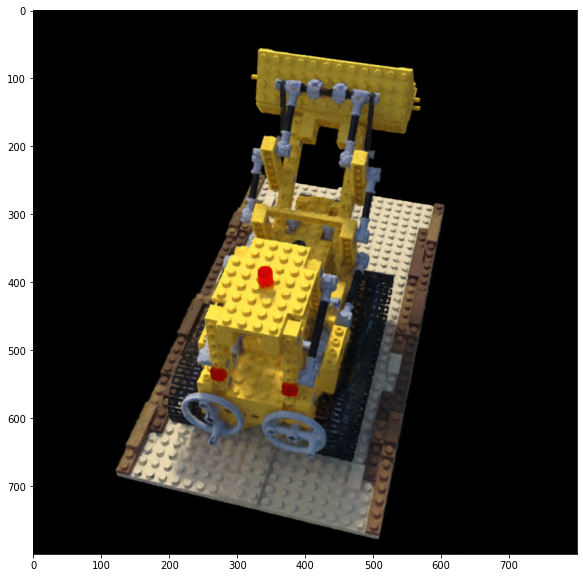

In [ ]:
# view a sample rendered image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
matplotlib.rcParams['figure.figsize'] = [10, 10]
img = mpimg.imread('/content/instant-ngp/data/screenshots/r_4.png')
imgplot = plt.imshow(img)
plt.show()